In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#root_path = 'gdrive/My Drive/your_project_folder/'  #change dir to your project folder
root_path = '/content/drive/My Drive/Hackathon'


In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-12-24 04:28:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-12-24 04:28:06--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-12-24 04:28:06--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
# Now just move the glove.6B.100d.txt file directly from local folder to your drive folder from table of content file.

In [2]:
import keras
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
import numpy as np
import pandas 

import pandas as pd
from collections import defaultdict
import re


import sys
import os

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from keras.models import Model



#NlTK

from wordcloud import WordCloud,STOPWORDS
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


#For Model

from keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import Model
from sklearn.model_selection import train_test_split

# Train Test Split
from sklearn.model_selection import train_test_split

MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 200000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10186032227981011991
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4301372376794876670
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 1230959728684556493
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15956161332
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2871042171773516752
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df = pd.read_csv("/content/drive/My Drive/Hackathon/train.tsv",sep='\t') # Here train.tsv is the same dataset just upload it to your respective google drive and copy the path here
df.head()

,Unnamed: 0,Unnamed: 0.1,id,author,created_utc,domain,hasImage,num_comments,score,title,upvote_ratio,subreddit,clean_title,2_way_label,3_way_label,5_way_label,image_url
0,0,0,2v5szv,NaN,1.423368e+09,news8000.com,False,1,6,"Man tries to stop armed robbery, charged with ...",0.72,nottheonion,man tries to stop armed robbery charged with f...,1,0,0,NaN
1,1,1,c0ex4g,wastebinaccount,1.560481e+09,i.redd.it,False,8,7,Cylas - Old Memories,0.89,fakealbumcovers,cylas old memories,0,2,1,NaN
2,2,2,13teri,NaN,1.353946e+09,reason.com,False,3,38,President Obama Briefly Worried That His Unacc...,0.73,nottheonion,president obama briefly worried that his unacc...,1,0,0,NaN
3,3,3,ck6e99,dustyd22,1.564567e+09,i.redd.it,False,224,22344,Every morning I wake up to some asshole Brachi...,0.85,confusing_perspective,every morning i wake up to some asshole brachi...,0,2,2,NaN
4,4,4,93swo6,thedylmeister,1.533157e+09,i.redd.it,True,0,2,"O-Vac, protector of the cosmic dust temple",0.76,pareidolia,ovac protector of the cosmic dust temple,0,2,2,https://preview.redd.it/zkz1pt6tojd11.jpg?widt...


In [4]:
df1=df.iloc[:,[7,8,10,12,13]]#['num_comments','score','upvote_ratio','clean_title','2_way_label'])
df1=df1.iloc[:,:]
df1.head()

,num_comments,score,upvote_ratio,clean_title,2_way_label
0,1,6,0.72,man tries to stop armed robbery charged with f...,1
1,8,7,0.89,cylas old memories,0
2,3,38,0.73,president obama briefly worried that his unacc...,1
3,224,22344,0.85,every morning i wake up to some asshole brachi...,0
4,0,2,0.76,ovac protector of the cosmic dust temple,0


In [5]:
df1.iloc[:,:-1]=df1.iloc[:,:-1].replace(to_replace = np.nan, value ='') 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
df1.iloc[:,-1]=df1.iloc[:,-1].replace(to_replace = np.nan, value =0) 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
texts = []
labels = []

for i in range(len(list(df1.clean_title))):
    text = str(df1['clean_title'][i])
    texts.append(text)
    labels.append(df1['2_way_label'][i])
    
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

#print('Found %s unique tokens.' % len(word_index))

In [8]:
# Pad input sequences
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(labels,dtype='int32'),num_classes = 2)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (669564, 1000)
Shape of label tensor: (669564, 2)


In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dense, Embedding, LSTM, GRU

In [0]:
GLOVE_DIR = "" 
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, '/content/drive/My Drive/glove.6B.100d.txt'), encoding="utf8") #The file that you had downloaded and moved from local session to drive. 

In [11]:
for line in f:
    values = line.split()
    #print(values[1:])
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove.' % len(embeddings_index))

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH)

Total 400000 word vectors in Glove.



In [0]:
from keras.callbacks import ModelCheckpoint
from keras import layers

embedding_vecor_length = 32
modell = Sequential()
modell.add(embedding_layer)
modell.add(Dropout(0.2))
modell.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
modell.add(MaxPooling1D(pool_size=2))
modell.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='sigmoid'))
modell.add(MaxPooling1D(pool_size=2))
modell.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
modell.add(MaxPooling1D(pool_size=2))
modell.add(LSTM(100,activation='relu',recurrent_activation='sigmoid',dropout=0.2, recurrent_dropout=0.2))
modell.add(BatchNormalization())
modell.add(Dense(1024, activation='relu'))
modell.add(layers.Dropout(0.2))
modell.add(Dense(512,  activation='relu'))
modell.add(layers.Dropout(0.2))
modell.add(Dense(256, activation='relu'))
modell.add(layers.Dropout(0.2))
modell.add(Dense(128, activation='relu'))
modell.add(layers.Dropout(0.2))
modell.add(Dense(64, activation='relu'))
modell.add(layers.Dropout(0.2))
modell.add(Dense(2, activation='softmax'))

modell.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modell.summary())

filepath = "/content/hackerthon1/model.h5" # Location to save yor model
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
modell.fit(data, labels,validation_split=0.05, epochs=9, batch_size=1024 , callbacks=callbacks_list)

In [0]:
import os

base_dir = 'hackerthon1'
os.mkdir(base_dir)

In [0]:
base_dir = 'hackerthon'
os.mkdir(base_dir)

In [0]:
from keras.models import load_model
filepath = "/content/hackerthon1/model.h5"  # Location to get yor model
filepath1 = "/content/hackerthon/hackerthon1.h5" # Location to save yor model
checkpoint = ModelCheckpoint(filepath1, monitor='loss', verbose=1, save_best_only=True, mode='min')

new_model = load_model(filepath)
#checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
#new_model.fit(x_train, y_train, epochs=5, batch_size=50, callbacks=callbacks_list)


new_model.fit(data, labels,validation_split=0.05, epochs=9, batch_size=1024 , callbacks=callbacks_list)

Train on 636085 samples, validate on 33479 samples
Epoch 1/9
636085/636085 [==============================] - 245s 386us/step - loss: 0.2404 - acc: 0.8991 - val_loss: 0.3768 - val_acc: 0.8351

Epoch 00001: loss improved from inf to 0.24035, saving model to /content/hackerthon/hackerthon1.h5
Epoch 2/9
636085/636085 [==============================] - 242s 380us/step - loss: 0.2301 - acc: 0.9033 - val_loss: 0.3854 - val_acc: 0.8373

Epoch 00002: loss improved from 0.24035 to 0.23010, saving model to /content/hackerthon/hackerthon1.h5
Epoch 3/9
636085/636085 [==============================] - 240s 377us/step - loss: 0.2214 - acc: 0.9078 - val_loss: 0.3849 - val_acc: 0.8342

Epoch 00003: loss improved from 0.23010 to 0.22140, saving model to /content/hackerthon/hackerthon1.h5
Epoch 4/9
636085/636085 [==============================] - 243s 382us/step - loss: 0.2131 - acc: 0.9111 - val_loss: 0.3867 - val_acc: 0.8360

Epoch 00004: loss improved from 0.22140 to 0.21307, saving model to /content

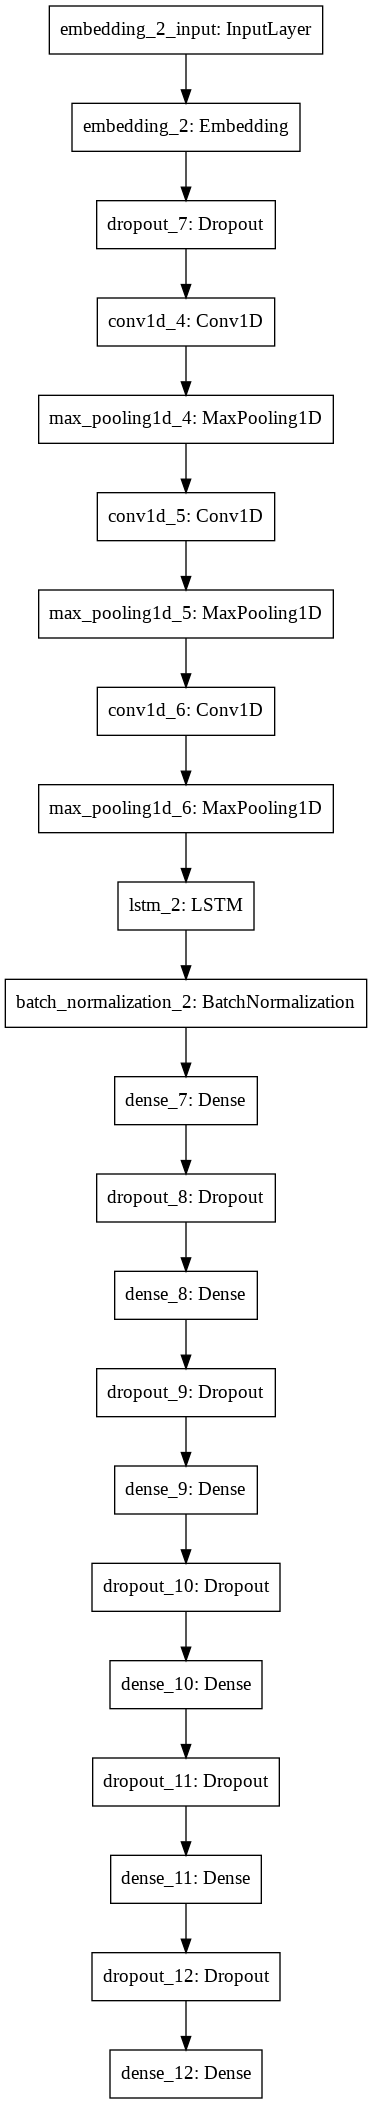

In [0]:
from keras.utils import plot_model
plot_model(new_model, to_file='new_model.png')

In [30]:
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import Model
from sklearn.model_selection import train_test_split



sequence_length = 1000
vocabulary_size = 200000
embedding_dim = 100
filter_sizes = [3,4,5]
num_filters = 512
drop = 0.5

epochs = 4
batch_size = 30

# this returns a tensor
#print("Creating Model...")
inputs = Input(shape=(sequence_length,), dtype='int32')
#embedding = Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=sequence_length)(inputs)
reshape = Reshape((sequence_length,embedding_dim,1))(embedding_layer(inputs))
conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)

maxpool_0 = MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(drop)(flatten)
output = Dense(units=2, activation='softmax')(dropout)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)



filepath = "/content/drive/My Drive/Hackathon/modelFakeNewsCNN.h5" # Location to get yor model
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

#checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
print("Traning Model...")

hist=model.fit(data, labels,validation_split=0.05, epochs=9, batch_size=1024 , callbacks=callbacks_list)





#model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[checkpoint], validation_data=(X_test, y_test))  # starts training





Traning Model...
Train on 636085 samples, validate on 33479 samples
Epoch 1/9
636085/636085 [==============================] - 992s 2ms/step - loss: 0.5987 - acc: 0.7056 - val_loss: 0.4737 - val_acc: 0.7725

Epoch 00001: loss improved from inf to 0.59875, saving model to /content/drive/My Drive/Hackathon/modelFakeNewsCNN.h5
Epoch 2/9
636085/636085 [==============================] - 992s 2ms/step - loss: 0.4832 - acc: 0.7683 - val_loss: 0.4436 - val_acc: 0.7938

Epoch 00002: loss improved from 0.59875 to 0.48321, saving model to /content/drive/My Drive/Hackathon/modelFakeNewsCNN.h5
Epoch 3/9
636085/636085 [==============================] - 992s 2ms/step - loss: 0.4490 - acc: 0.7892 - val_loss: 0.4240 - val_acc: 0.8051

Epoch 00003: loss improved from 0.48321 to 0.44903, saving model to /content/drive/My Drive/Hackathon/modelFakeNewsCNN.h5
Epoch 4/9
636085/636085 [==============================] - 992s 2ms/step - loss: 0.4271 - acc: 0.8022 - val_loss: 0.4099 - val_acc: 0.8129

Epoch 0000

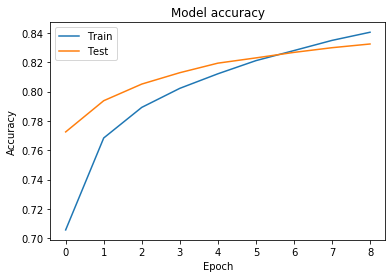

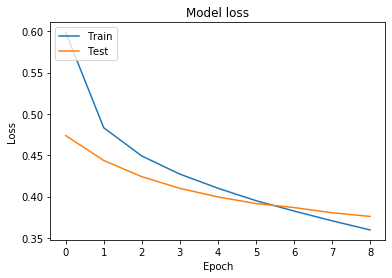

In [32]:

import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
from keras.models import load_model
filepath = "/content/drive/My Drive/Hackathon/modelFakeNewsCNNUpdated.h5"  # Location to get yor model
filepath1 = "/content/drive/My Drive/Hackathon/modelFakeNewsCNNUpdated.h5" # Location to save yor model
checkpoint = ModelCheckpoint(filepath1, monitor='loss', verbose=1, save_best_only=True, mode='min')

new_model = load_model(filepath)
#checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
#new_model.fit(x_train, y_train, epochs=5, batch_size=50, callbacks=callbacks_list)


hist=new_model.fit(data, labels,validation_split=0.05, epochs=3, batch_size=1024 , callbacks=callbacks_list)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 636085 samples, validate on 33479 samples
Epoch 1/3
636085/636085 [==============================] - 1003s 2ms/step - loss: 0.2936 - acc: 0.8739 - val_loss: 0.3716 - val_acc: 0.8402

Epoch 00001: loss improved from inf to 0.29361, saving model to /content/drive/My Drive/Hackathon/modelFakeNewsCNNUpdated.h5
Epoch 2/3
636085/636085 [==============================] - 993s 2ms/step - loss: 0.2873 - acc: 0.8771 - val_loss: 0.3742 - val_acc: 0.8399

Epoch 00002: loss improved from 0.29361 to 0.28731, saving model to /content/drive/My Drive/Hackathon/modelFakeNewsCNNUpdated.h5
Epoch 3/3
636085/636085 [==============================] - 993s 2ms/step - loss: 0.2806 - acc: 0.8801 - val_loss: 0.3770 - val_acc: 0.8407

Epoch 00003: loss improved from 0.28731 to 0.28056

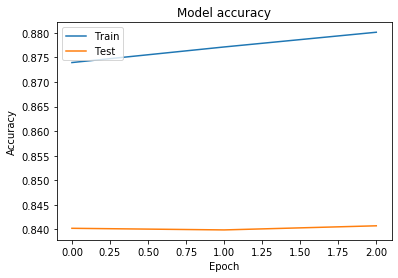

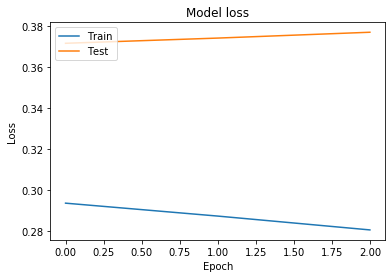

In [15]:

import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
from keras.models import load_model
filepath = "/content/drive/My Drive/Hackathon/modelFakeNewsCNNUpdated.h5"  # Location to get yor model
filepath1 = "/content/drive/My Drive/Hackathon/modelFakeNewsCNNUpdated1.h5" # Location to save yor model
checkpoint = ModelCheckpoint(filepath1, monitor='loss', verbose=1, save_best_only=True, mode='min')

new_model = load_model(filepath)
#checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
#new_model.fit(x_train, y_train, epochs=5, batch_size=50, callbacks=callbacks_list)


hist=new_model.fit(data, labels,validation_split=0.05, epochs=10, batch_size=1024 , callbacks=callbacks_list)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 636085 samples, validate on 33479 samples
Epoch 1/10
636085/636085 [==============================] - 1001s 2ms/step - loss: 0.2748 - acc: 0.8835 - val_loss: 0.3772 - val_acc: 0.8404

Epoch 00001: loss improved from inf to 0.27476, saving model to /content/drive/My Drive/Hackathon/modelFakeNewsCNNUpdated1.h5
Epoch 2/10
636085/636085 [==============================] - 992s 2ms/step - loss: 0.2684 - acc: 0.8864 - val_loss: 0.3798 - val_acc: 0.8403

Epoch 00002: loss improved from 0.27476 to 0.26837, saving model to /content/drive/My Drive/Hackathon/modelFakeNewsCNNUpdated1.h5
Epoch 3/10
636085/636085 [==============================] - 992s 2ms/step - loss: 0.2632 - acc: 0.8885 - val_loss: 0.3816 - val_acc: 0.8401

Epoch 00003: loss improved from 0.26837 to 0.

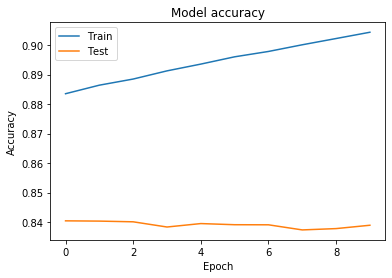

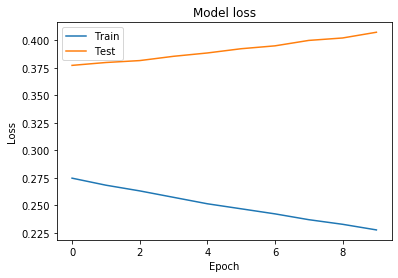

In [13]:

import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()